## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [2]:
### YOUR CODE HERE ###
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
# названия столбцов
col = df.columns
col

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

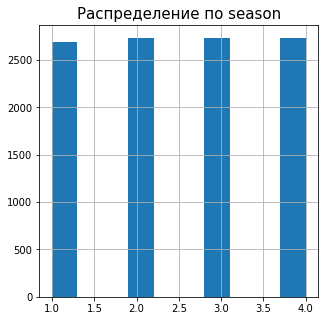

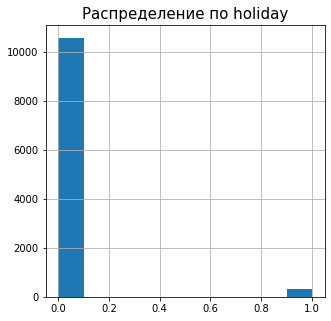

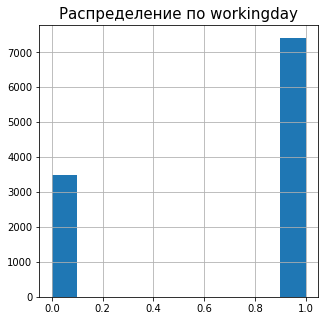

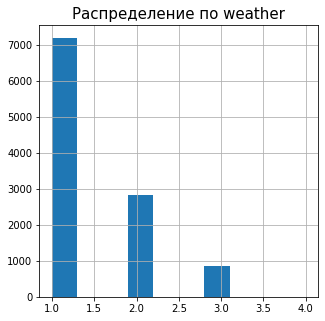

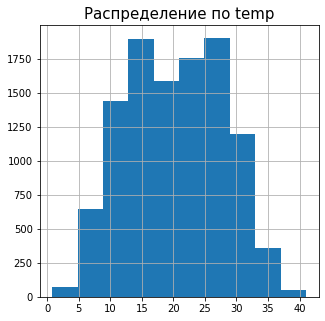

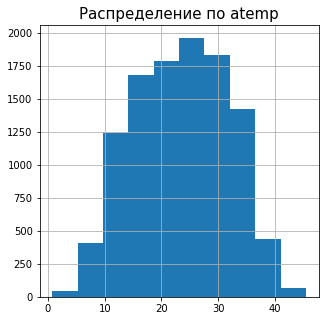

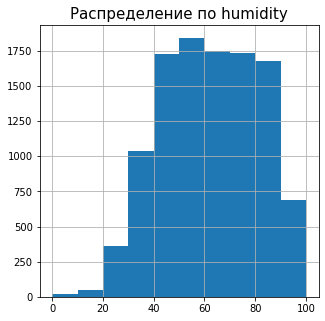

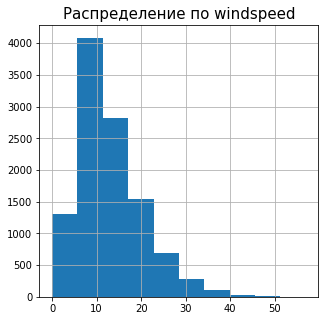

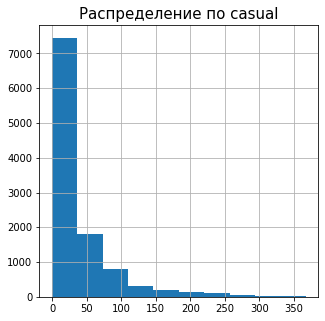

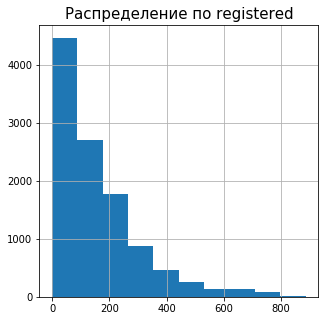

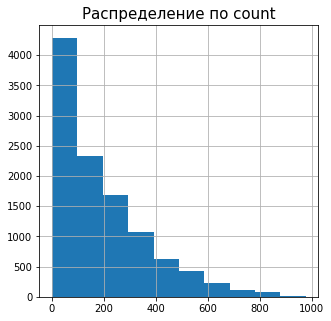

In [5]:
for name in col:
    plt.figure(figsize=(5,5))
    plt.hist(df[name])
    plt.title('Распределение по ' + name, fontsize=15)
    plt.grid()
    plt.show()
    

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [6]:
### YOUR CODE HERE ###
# функция для вычисления стандарнтых метрик
def metrics(df1, column):
    print ('для ', column)
    print(df1[column].mean(), " - среднее значение")
    print(df1[column].std(), " - дисперсия")
    print(np.percentile(df1[column], 50), " - 50 перцентиль")
    print(np.percentile(df1[column], 75), " - 75 перцентиль")
    print(np.percentile(df1[column], 99), " - 99 перцентиль", )
    print(df1[column].value_counts().nlargest(1), " - мода", ) 
    print('\n')


In [7]:
for name in col:
    metrics(df, name)
    

для  season
2.5066139996325556  - среднее значение
1.1161743093442644  - дисперсия
3.0  - 50 перцентиль
4.0  - 75 перцентиль
4.0  - 99 перцентиль
4    2734
Name: season, dtype: int64  - мода


для  holiday
0.02856880396839978  - среднее значение
0.16659885062471985  - дисперсия
0.0  - 50 перцентиль
0.0  - 75 перцентиль
1.0  - 99 перцентиль
0    10575
Name: holiday, dtype: int64  - мода


для  workingday
0.6808745177291935  - среднее значение
0.4661591687997421  - дисперсия
1.0  - 50 перцентиль
1.0  - 75 перцентиль
1.0  - 99 перцентиль
1    7412
Name: workingday, dtype: int64  - мода


для  weather
1.418427337865148  - среднее значение
0.6338385858190921  - дисперсия
1.0  - 50 перцентиль
2.0  - 75 перцентиль
3.0  - 99 перцентиль
1    7192
Name: weather, dtype: int64  - мода


для  temp
20.230859819952173  - среднее значение
7.791589843987506  - дисперсия
20.5  - 50 перцентиль
26.24  - 75 перцентиль
36.08  - 99 перцентиль
14.76    467
Name: temp, dtype: int64  - мода


для  atemp
23.6550

у метрик season, holiday, workingday, weather - малый разброс данных <br>
casual - среднее значение гораздо меньше медианы, что говорит о большом количестве малых значений

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [8]:
### YOUR CODE HERE ###
# функция для вычисления ассиметричных метрик
def metrics_anomal(df1, column):
    print ('для ', column)
    print(kurtosis(df1[column]), ' = Эксцесс')
    print(skew(df1[column]), ' = Ассиметрия', )
    print('\n')

In [9]:
for name in col:    
    metrics_anomal(df, name)  

для  season
-1.3555899543299803  = Эксцесс
-0.007074695296526289  = Ассиметрия


для  holiday
30.032624417535125  = Эксцесс
5.6597371332540805  = Ассиметрия


для  workingday
-1.3977369782030475  = Эксцесс
-0.7760560687198784  = Ассиметрия


для  weather
0.39480007841067577  = Эксцесс
1.2433126730817885  = Ассиметрия


для  temp
-0.9146613849825282  = Эксцесс
0.0036903358354289715  = Ассиметрия


для  atemp
-0.8502363689497141  = Эксцесс
-0.10254538108264065  = Ассиметрия


для  humidity
-0.760019710012902  = Эксцесс
-0.0863232869219358  = Ассиметрия


для  windspeed
0.629292367034056  = Эксцесс
0.5886853963635482  = Ассиметрия


для  casual
7.547610130561701  = Эксцесс
2.495404491505502  = Ассиметрия


для  registered
2.6243238654959855  = Эксцесс
1.5245944734221468  = Ассиметрия


для  count
1.2989447727380323  = Эксцесс
1.241895058803035  = Ассиметрия




### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [10]:
### YOUR CODE HERE ###
d = np.array([])
for name in col:
    d = np.append(d, df[name].std())
name_max_d = col[d.argmax()] # метрика с самой большой дисперсией
name_max_d

'count'

In [11]:
alpha = 0.95 # доверительная вероятность
interval = stats.norm.interval(alpha, loc=df[name_max_d].mean(), scale=df[name_max_d].std())
interval

(-163.46247359398893, 546.6107374190854)

Text(0.5, 1.0, 'Доверительный интервал')

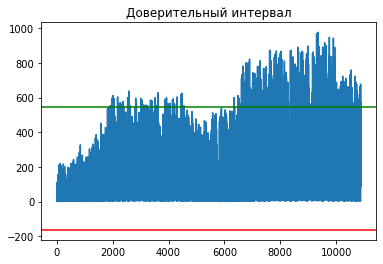

In [12]:
df[name_max_d].plot()
plt.axhline(y=interval[1], color="g", linestyle="-")
plt.axhline(y=interval[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

In [13]:
alpha = 0.9972 # доверительная вероятность для трх сигм
interval = stats.norm.interval(alpha, loc=df[name_max_d].mean(), scale=df[name_max_d].std())
df[(df[name_max_d] >= interval[0]) ^ (df[name_max_d] <= interval[1])].shape[0] #количество, выходящее за 3 сигмы

149

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [14]:
### YOUR CODE HERE ###
def find_anomaly(df1, column):
    upper_level = df1[column].mean() + 3*df1[column].std()
    lower_level = df1[column].mean() - 3*df1[column].std()
    anomaly = df1[(df1[column] >= upper_level)^(df1[column] <= lower_level)]
    return anomaly,upper_level,lower_level


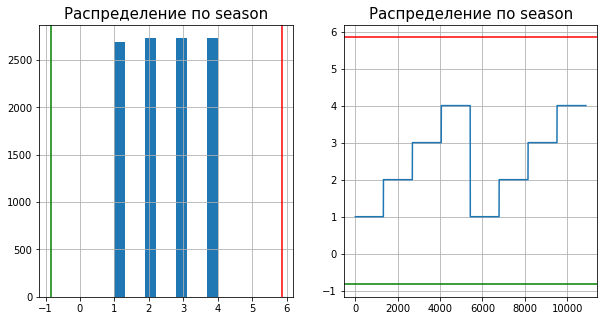

количество значений, выходящих за три сигмы у метрики  season  =  0 



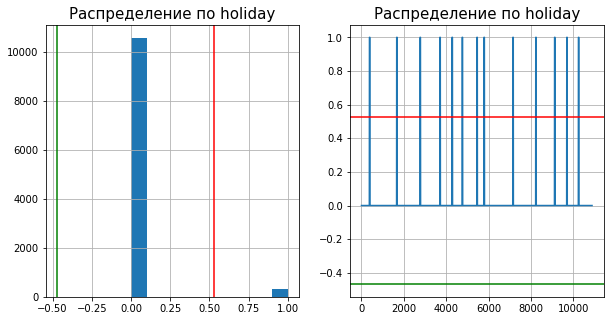

количество значений, выходящих за три сигмы у метрики  holiday  =  311 



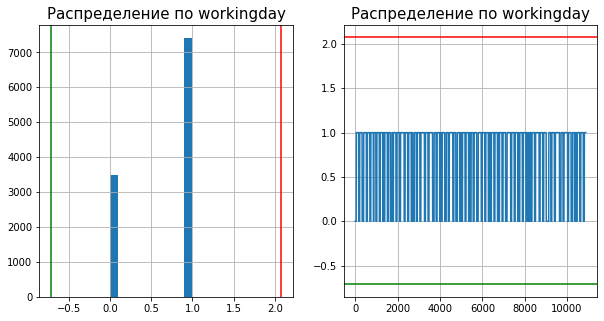

количество значений, выходящих за три сигмы у метрики  workingday  =  0 



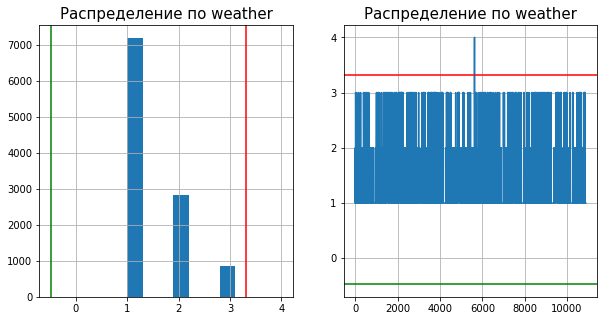

количество значений, выходящих за три сигмы у метрики  weather  =  1 



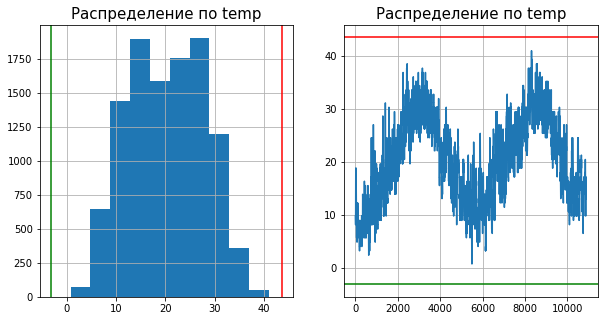

количество значений, выходящих за три сигмы у метрики  temp  =  0 



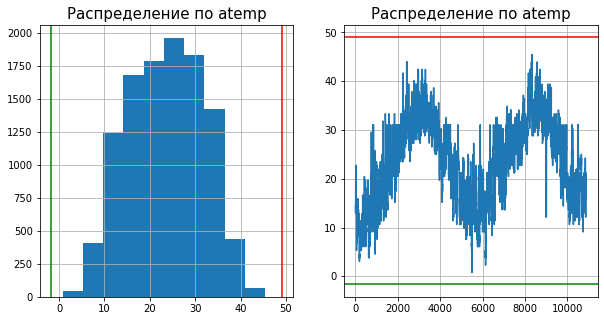

количество значений, выходящих за три сигмы у метрики  atemp  =  0 



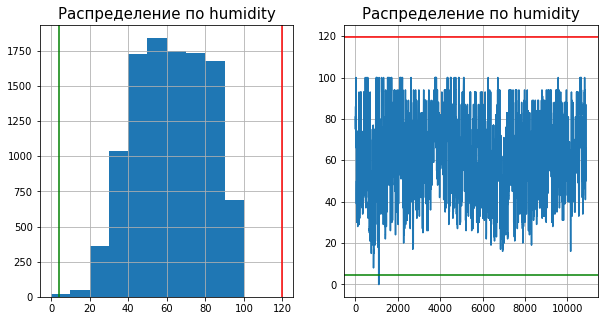

количество значений, выходящих за три сигмы у метрики  humidity  =  22 



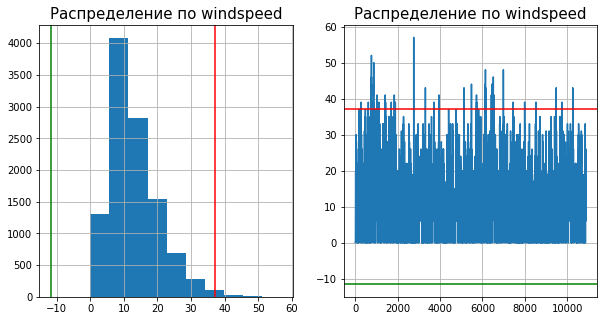

количество значений, выходящих за три сигмы у метрики  windspeed  =  67 



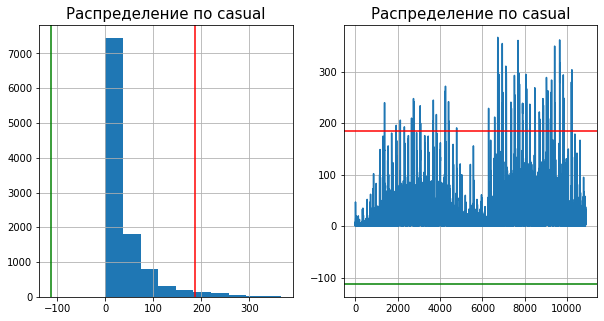

количество значений, выходящих за три сигмы у метрики  casual  =  292 



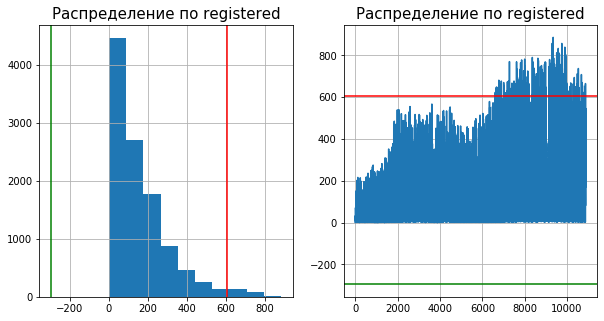

количество значений, выходящих за три сигмы у метрики  registered  =  235 



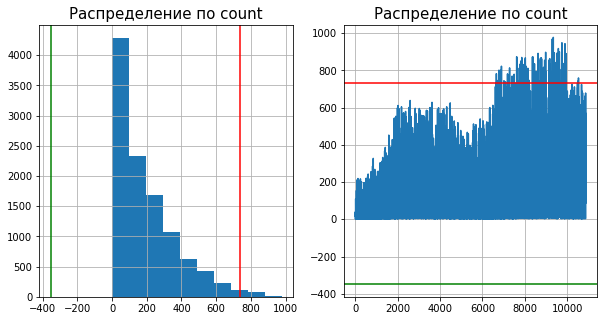

количество значений, выходящих за три сигмы у метрики  count  =  147 



In [15]:
num_ = np.array([])
for name in col:
    #
    anomaly = find_anomaly(df, name)
    num = anomaly[0].shape[0] # количество значений, выходящих за три сигмы
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    # график гистограммы
    axes[0].hist(df[name])
    axes[0].axvline(x=anomaly[1], color="r", linestyle="-")
    axes[0].axvline(x=anomaly[2], color="g", linestyle="-")
    axes[0].set_title('Распределение по ' + name, fontsize=15)
    axes[0].grid()
    # 
    alpha = 0.9972 # доверительная вероятность - для трех сигм
    interval = stats.norm.interval(alpha, loc=df[name].mean(), scale=df[name].std())
    # график 
    axes[1].plot(df[name])
    axes[1].axhline(y=interval[1], color="r", linestyle="-")
    axes[1].axhline(y=interval[0], color="g", linestyle="-")
    axes[1].set_title('Распределение по ' + name, fontsize=15)
    axes[1].grid()
    
    plt.show()
    print ('количество значений, выходящих за три сигмы у метрики ',name,' = ', num, '\n')
    num_ = np.append(num_,num)
    
    

In [16]:
col[num_.argmax()] # метрика с самым большим количеством значений, выходящим за три сигмы

'holiday'

из метрик, имеющих достаточный разброс значений:
casual - 292 анамолии

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [17]:
### YOUR CODE HERE ###
corr_m = df.corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


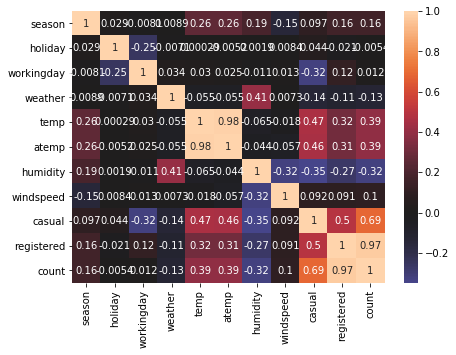

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Связь слабая, Коэффициент корреляции 0.16343901657636173


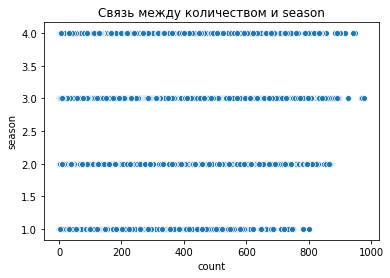

Связь слабая, Коэффициент корреляции -0.005392984477774379


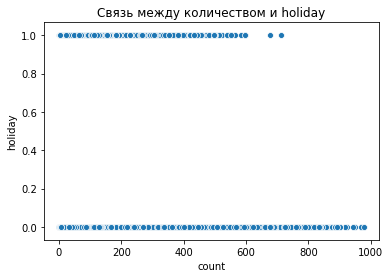

Связь слабая, Коэффициент корреляции 0.011593866091574376


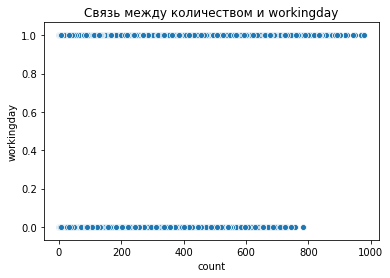

Связь слабая, Коэффициент корреляции -0.1286552010385064


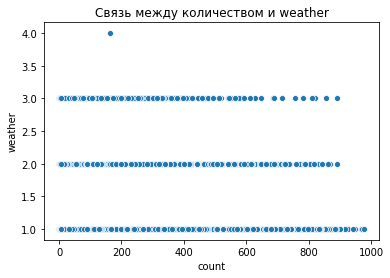

Связь умеренная, Коэффициент корреляции 0.39445364496724933


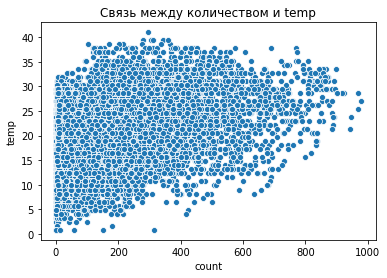

Связь умеренная, Коэффициент корреляции 0.3897844366269766


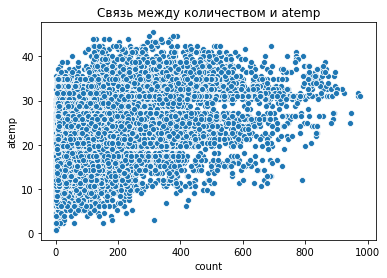

Связь умеренная, Коэффициент корреляции -0.31737147887659445


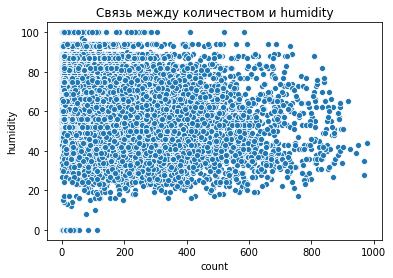

Связь слабая, Коэффициент корреляции 0.10136947021033277


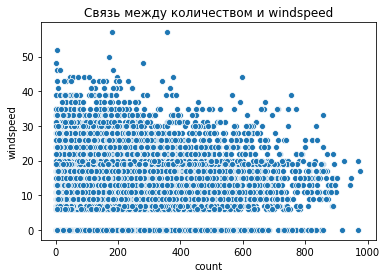

Связь заметная, Коэффициент корреляции 0.6904135653286744


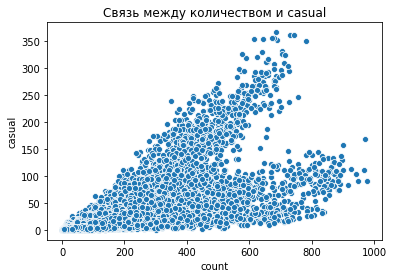

Связь весьма высокая, Коэффициент корреляции 0.9709481058098283


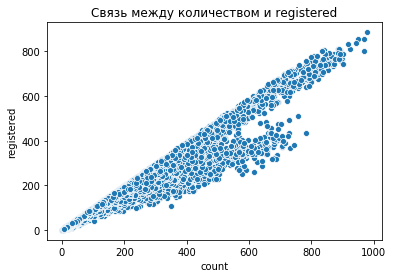

In [19]:
for name in col[:-1]:
    curr_corr = df[name].corr(df['count'])
    sns.scatterplot(x="count", y=name, data=df)
    
    if abs(curr_corr) >= 0.9:
        print("Связь весьма высокая, Коэффициент корреляции " + str(curr_corr))
    elif abs(curr_corr) >= 0.7 and abs(curr_corr) < 0.9:
        print("Связь высокая, Коэффициент корреляции " + str(curr_corr))
    elif abs(curr_corr) >= 0.5 and abs(curr_corr) < 0.7:
        print("Связь заметная, Коэффициент корреляции " + str(curr_corr))
    elif abs(curr_corr) >= 0.3 and abs(curr_corr) < 0.5:
        print("Связь умеренная, Коэффициент корреляции " + str(curr_corr))
    else:
        print("Связь слабая, Коэффициент корреляции " + str(curr_corr))
              
    plt.title("Связь между количеством и "+str(name))
    plt.show()

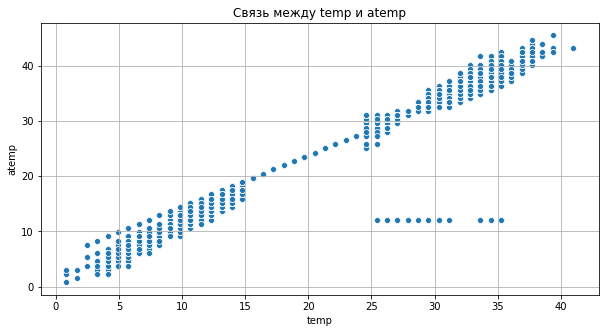

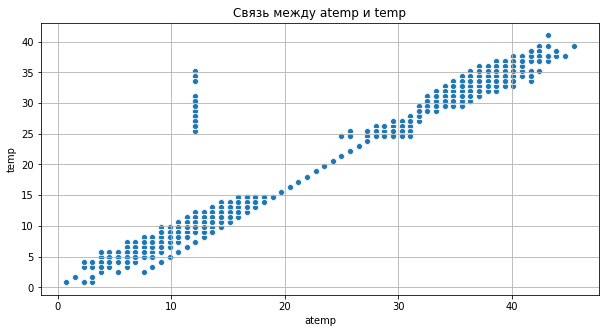

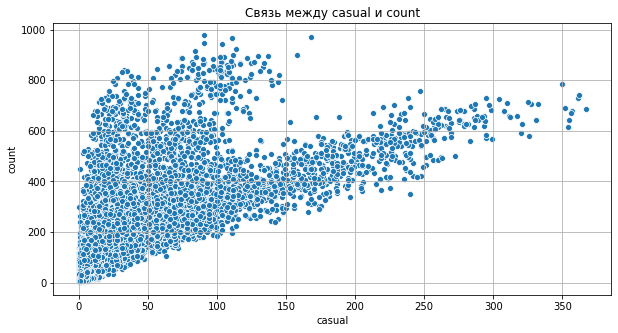

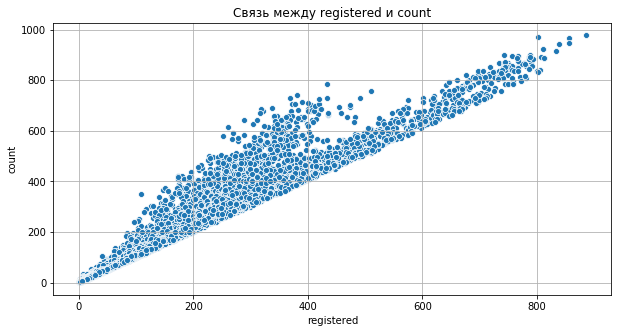

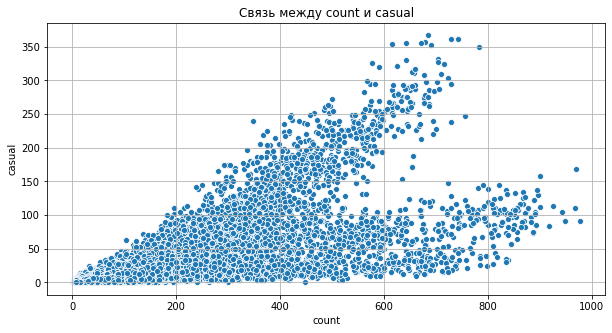

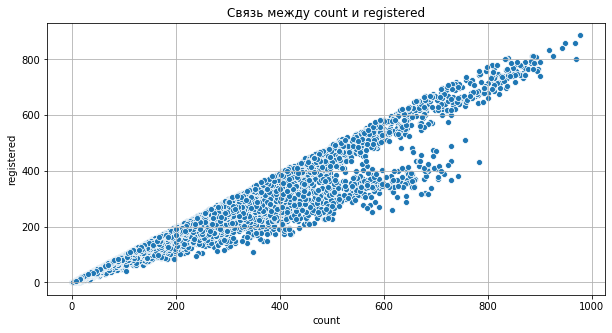

In [20]:
for name1 in col:
    for name2 in col:
        if name1 != name2:
            curr_corr = df[name1].corr(df[name2])
            if curr_corr >= 0.5:
                plt.figure(figsize=(10,5))
                sns.scatterplot(x=name1, y=name2, data=df)
                plt.title('Связь между '+ name1+ ' и '+ name2)
                plt.grid()
                plt.show()
            

заметная прямая линейная связь между count и casual <br>
весьма высокая прямая линейная связь есть между count и registered <br>
весьма высокая прямая линейная связь есть между temp и atemp